<a href="https://colab.research.google.com/github/Parul30163/python/blob/main/ml04june.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from  tensorflow.keras  import datasets ,layers , models
import matplotlib.pyplot as plt

In [ ]:
# load and split Datasets

(train_images ,train_labels),(test_images ,test_labels)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
# normalize  pixel value to be between 0 and  1
train_images ,test_images=train_images/255.0 ,test_images/255.0

In [ ]:
class_names =['airplane' ,'automobile','bird','cat','deer','dog' , 'frog','horse','ship','truck']

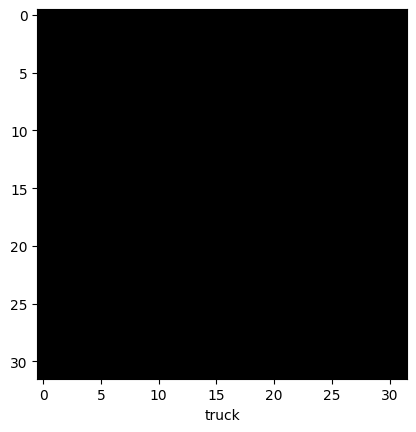

In [ ]:
#lets look at a one image . we change this to look at other images ( img_index= 1,2,3....)
IMG_INDEX=1
plt.imshow(train_images[IMG_INDEX],cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])

plt.show()

In [ ]:
model =models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2))) # this layer will perform the max pooling operation using 2x2 samples and a
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [ ]:
model.summary() # lets have a look at our model so far

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [ ]:
model.add(layers.Flatten())
#convert high D. data into 1D data
#we need to take these extracted features and add a way to classify them.
#this is why we add the layers to our model.
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
# we can se the flatten layer changes the shape of our data so that we can feed it ti the 64 nodes dence layer,
#followed by the final output layers,  followed by the final output layers of 10 neurones ( one of each class)

In [ ]:
# now we will train and compile the model  using the recimmanded hyperparameter from tenserflow
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics =['accuracy'])

In [ ]:
history = model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1479/1563 [===========================>..] - ETA: 2s - loss: 2.3028 - accuracy: 0.0974

KeyboardInterrupt: 

In [ ]:
# train on 50000 sample and validate on 10000 samples.

In [ ]:
# evaluate the model ==> we can determine how well the model performed by looking at its performnce on the test data set

In [ ]:
test_loss , test_acc =model.evaluate(test_images,test_labels,verbose=2)
print(test_acc)

In [ ]:
# in this model we get our accuracy ~ 70%. This is okay but surely there is a way to improve on this by pretained model and fine tuning.



In [ ]:
# Pre-trained Models and Fine tunning ==>

#a pre-trained model is a machine learning model that has been trained on a large dataset to perform a
#specific task,
